In [136]:
import os
import pickle
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
import scipy
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import project_path
from src.constants import MODELS_DIRPATH, N_CLUSTERS

In [140]:
with open(os.path.join(MODELS_DIRPATH, "rescale.pkl"), "rb") as file:
    chunk_to_features = pickle.load(file)

with open(os.path.join(MODELS_DIRPATH, "kmeans_cluster_to_chunks.pkl"), "rb") as file:
    cluster_to_chunks = pickle.load(file)

with open(os.path.join(MODELS_DIRPATH, "kmeans_means.pkl"), "rb") as file:
    means = pickle.load(file)

model = Word2Vec.load(os.path.join(MODELS_DIRPATH, "word2vec.model"))

# Total number of chunks

In [8]:
len(chunk_to_features)

209492

# Chunks per composer

In [9]:
composers = {}
for chunk in chunk_to_features:
    composer = chunk.dirname.split(" - ")[0]
    
    if composer not in composers:
        composers[composer] = 0
    composers[composer] += 1

In [10]:
composers

{'Beethoven': 36554,
 'Clementi': 56364,
 'Schubert': 27653,
 'Mozart': 27516,
 'Hummel': 8884,
 'Haydn': 52521}

(-1.1068399637815882, 1.100325712561028, -1.100902564432326, 1.106310017708231)

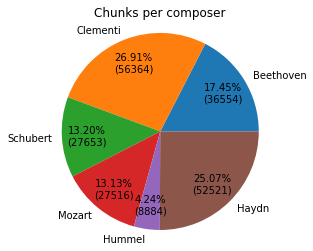

In [41]:
x = []
labels = []
for composer, num_chunks in composers.items():
    x.append(num_chunks)
    labels.append(composer)
    
def autopct(pct):
    total = np.sum(x)
    count = int(round(pct * total / 100.0))
    return "{p:.2f}%\n({c:d})".format(p=pct, c=count)

plt.pie(x, labels=labels, autopct=autopct, pctdistance=0.75)

plt.title("Chunks per composer")
plt.axis("image")

# Feature distribution

## Zero crossing rate

Text(0.5,1,'Zero crossing rate distribution')

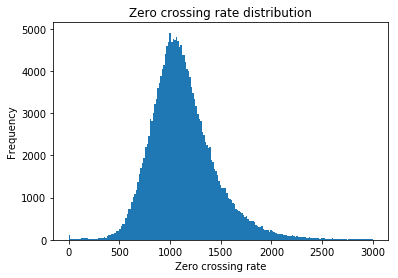

In [101]:
x = [
    features.zero_crossing_rate
    for features in chunk_to_features.values()
]

plt.hist(x, bins=np.linspace(0, 3000, 200))

plt.xlabel("Zero crossing rate")
plt.ylabel("Frequency")
plt.title("Zero crossing rate distribution")

In [69]:
outlier_count = 0
for zero_crossing_rate in x:
    if zero_crossing_rate > 3000:
        outlier_count += 1

display(outlier_count)
display(outlier_count / len(x))

2492

0.011895442308059495

In [102]:
display(scipy.stats.describe(x))
display(np.std(x))

DescribeResult(nobs=209492, minmax=(0, 38966), mean=1222.3372682489069, variance=1270982.371239394, skewness=13.701578333547333, kurtosis=254.0640983680127)

1127.3758487150994

## Spectral centroid

Text(0.5,1,'Spectral centroid distribution')

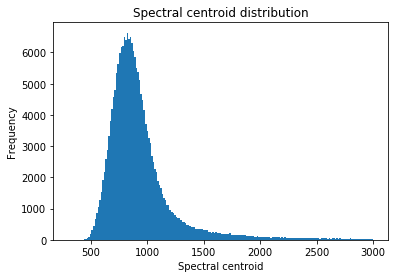

In [95]:
x = [
    features.spectral_centroid
    for features in chunk_to_features.values()
]

plt.hist(x, bins=np.linspace(300, 3000, 200))

plt.xlabel("Spectral centroid")
plt.ylabel("Frequency")
plt.title("Spectral centroid distribution")

In [84]:
outlier_count = 0
for spectral_centroid in x:
    if spectral_centroid < 300 or spectral_centroid > 3000:
        outlier_count += 1

display(outlier_count)
display(outlier_count / len(x))

5566

0.02656903366238329

In [96]:
display(scipy.stats.describe(x))
display(np.std(x))

DescribeResult(nobs=209492, minmax=(0.0, 18271.975736911925), mean=1062.4365737651942, variance=891523.309914876, skewness=7.078320579392802, kurtosis=63.56795589987388)

944.2028671165834

## Spectral rolloff

Text(0.5,1,'Spectral rolloff distribution')

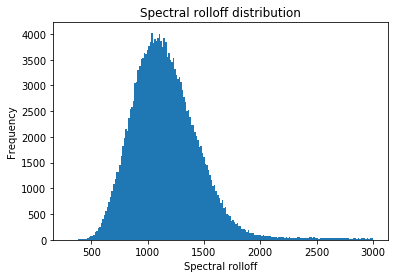

In [99]:
x = [
    features.spectral_rolloff
    for features in chunk_to_features.values()
]

plt.hist(x, bins=np.linspace(300, 3000, 200))

plt.xlabel("Spectral rolloff")
plt.ylabel("Frequency")
plt.title("Spectral rolloff distribution")

In [86]:
outlier_count = 0
for spectral_centroid in x:
    if spectral_centroid < 300 or spectral_centroid > 3000:
        outlier_count += 1

display(outlier_count)
display(outlier_count / len(x))

10407

0.049677314646860024

In [100]:
display(scipy.stats.describe(x))
display(np.std(x))

DescribeResult(nobs=209492, minmax=(0.0, 21676.7578125), mean=1584.5374094421777, variance=4966841.734928803, skewness=5.958955452132153, kurtosis=37.866843200591624)

2228.635911482255

# Chunks per cluster

In [50]:
counts = [
    (cluster, len(chunks))
    for cluster, chunks in cluster_to_chunks.items()
]
counts.sort(key=lambda x: x[1], reverse=True)

counts

[(664, 1339),
 (327, 1334),
 (490, 1283),
 (265, 1275),
 (616, 1235),
 (839, 1233),
 (865, 1210),
 (45, 1192),
 (44, 1182),
 (828, 1172),
 (419, 1151),
 (946, 1140),
 (367, 1139),
 (118, 1126),
 (461, 1111),
 (984, 1109),
 (403, 1096),
 (456, 1083),
 (590, 1080),
 (520, 1073),
 (280, 1069),
 (157, 1066),
 (105, 1060),
 (314, 1052),
 (676, 1044),
 (491, 1034),
 (432, 1023),
 (393, 1023),
 (192, 1000),
 (545, 991),
 (526, 991),
 (137, 984),
 (636, 976),
 (349, 972),
 (375, 971),
 (252, 955),
 (745, 953),
 (93, 952),
 (913, 951),
 (799, 938),
 (792, 934),
 (455, 912),
 (575, 899),
 (440, 896),
 (495, 886),
 (475, 879),
 (381, 876),
 (26, 875),
 (245, 867),
 (194, 863),
 (889, 861),
 (238, 858),
 (356, 855),
 (153, 849),
 (493, 847),
 (857, 844),
 (874, 843),
 (319, 840),
 (864, 838),
 (844, 838),
 (98, 830),
 (113, 827),
 (968, 825),
 (401, 822),
 (209, 820),
 (439, 817),
 (918, 815),
 (710, 813),
 (764, 812),
 (31, 809),
 (850, 802),
 (320, 800),
 (14, 793),
 (6, 792),
 (163, 786),
 (374

Text(0.5,1,'Chunks per cluster distribution')

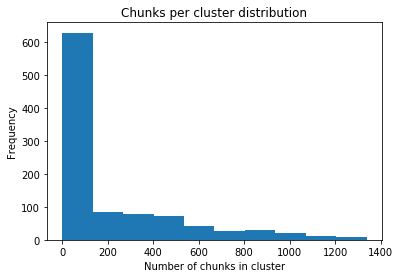

In [42]:
x = [
    len(chunks)
    for cluster, chunks in cluster_to_chunks.items()
]

plt.hist(x, bins=10)

plt.xlabel("Number of chunks in cluster")
plt.ylabel("Frequency")
plt.title("Chunks per cluster distribution")

# K-Means Cluster Means PCA

Text(0.5,1,'K-Means Cluster Means - Principal Component Analysis')

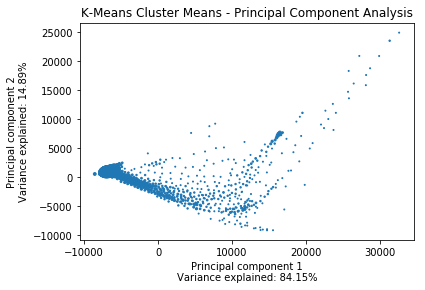

In [154]:
Xs = [
    means[cluster].reshape((1, -1))
    for cluster in range(N_CLUSTERS)
]
X = np.concatenate(Xs, axis=0)

pca = PCA(n_components=2, random_state=1731)
Z = pca.fit_transform(X)

size = [
    ceil(len(cluster_to_chunks[cluster]) / 10)
    for cluster in range(N_CLUSTERS)
]

plt.scatter(Z[:, 0], Z[:, 1], s=size)

plt.xlabel("Principal component 1\nVariance explained: " + "{:.2%}".format(pca.explained_variance_ratio_[0]))
plt.ylabel("Principal component 2\nVariance explained: " + "{:.2%}".format(pca.explained_variance_ratio_[1]))
plt.title("K-Means Cluster Means - Principal Component Analysis")

# Word2Vec Embeddings PCA

Text(0.5,1,'Word2Vec Embeddings - Principal Component Analysis')

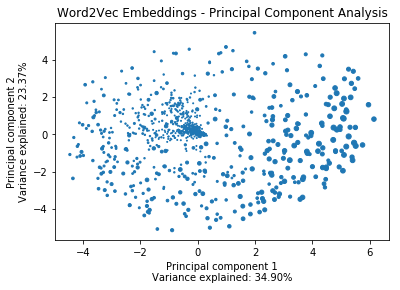

In [142]:
Xs = [
    model.wv[str(cluster)].reshape((1, -1))
    for cluster in range(N_CLUSTERS)
]
X = np.concatenate(Xs, axis=0)

pca = PCA(n_components=2, random_state=1731)
Z = pca.fit_transform(X)

size = [
    ceil(len(cluster_to_chunks[cluster]) / 50)
    for cluster in range(N_CLUSTERS)
]

plt.scatter(Z[:, 0], Z[:, 1], s=size)

plt.xlabel("Principal component 1\nVariance explained: " + "{:.2%}".format(pca.explained_variance_ratio_[0]))
plt.ylabel("Principal component 2\nVariance explained: " + "{:.2%}".format(pca.explained_variance_ratio_[1]))
plt.title("Word2Vec Embeddings - Principal Component Analysis")